In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for wordcloud making and image importing
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# And libraries for data transformation
import datetime

#words counter
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.tokenize import word_tokenize


# sentiment 
from textblob import TextBlob


In [2]:
# load data
# 2020-01
df_1 = pd.read_csv('csv/2020-01.csv')
df_1.head()

/Users/allen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id_str                      created_at         state  \
0  1219856157608566784  Wed Jan 22 05:35:46 +0000 2020    California   
1  1219856318779088897  Wed Jan 22 05:36:24 +0000 2020           NaN   
2  1219856816114487296  Wed Jan 22 05:38:23 +0000 2020     Wisconsin   
3  1219856906270990336  Wed Jan 22 05:38:44 +0000 2020  Pennsylvania   
4  1219857010696630272  Wed Jan 22 05:39:09 +0000 2020      New York   

  sentiment                                         text_clean  
0  positive  momsdemand brendaof fun fact  accidental death...  
1  negative  coronavirus inside us town attempting contain ...  
2  positive  troopax johnmaamd ravin coqundoodledoo edwardh...  
3  negative                    brutal season protect yourself   
4  positive  wish administrators cdc could impeached failin...

In [3]:
# 2020-02
df_2 = pd.read_csv('csv/2020-02.csv')
df_2.head()

/Users/allen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id_str                      created_at           state  \
0  1230903688161566723  Fri Feb 21 17:14:42 +0000 2020  North Carolina   
1  1230903689143111680  Fri Feb 21 17:14:43 +0000 2020        New York   
2  1230903689533181955  Fri Feb 21 17:14:43 +0000 2020      New Jersey   
3  1230903689663176711  Fri Feb 21 17:14:43 +0000 2020         Georgia   
4  1230903693064704000  Fri Feb 21 17:14:44 +0000 2020       Minnesota   

  sentiment                                         text_clean  
0   neutral  oh look now trump admitting china faked trade ...  
1  negative  heatherpoole military charter plenty stories s...  
2  negative  coronavirus spread chinese prisons least  prov...  
3  positive  realdonaldtrump correction tariff money paid a...  
4  positive  zubymusic imagine us stopped world police wed ...

In [4]:
df = pd.concat([df_1, df_2])

In [5]:
cases_date = '2/29/20'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3686883 entries, 0 to 2541527
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   id_str      object
 1   created_at  object
 2   state       object
 3   sentiment   object
 4   text_clean  object
dtypes: object(5)
memory usage: 168.8+ MB


In [7]:
df.isnull().sum(axis = 0)

id_str             0
created_at        39
state         285209
sentiment          0
text_clean     20681
dtype: int64

In [8]:
# delete the null row by 'text_clean'
df = df[df['text_clean'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3666202 entries, 0 to 2541527
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   id_str      object
 1   created_at  object
 2   state       object
 3   sentiment   object
 4   text_clean  object
dtypes: object(5)
memory usage: 167.8+ MB


In [9]:
df.isnull().sum(axis = 0)

id_str             0
created_at        39
state         283311
sentiment          0
text_clean         0
dtype: int64

In [10]:
# delete the null row by 'state'
df = df[df['state'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382891 entries, 0 to 2541527
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   id_str      object
 1   created_at  object
 2   state       object
 3   sentiment   object
 4   text_clean  object
dtypes: object(5)
memory usage: 154.9+ MB


In [11]:
import re, datetime
def extract_date(x):
#     match = re.search('\d{2}-\d{2}', x)
#     date = datetime.datetime.strptime(match.group(), '%m-%d').date()
    x_list = x.split(' ')
    month = '1' if x_list[1] == 'Jan' else '2' if x_list[1] == 'Feb' else '3' if x_list[1] =='Mar' else '4' if x_list[1] == 'Apr' else 'others'
    if len(x_list[2]) == 1:
        x_list[2] = '0' + x_list[2]
    date = month + '/' + x_list[2] + '/' + '20'
    return date
df['date'] = df['created_at'].apply(lambda x: extract_date(x))
df.head()

id_str                      created_at         state  \
0  1219856157608566784  Wed Jan 22 05:35:46 +0000 2020    California   
2  1219856816114487296  Wed Jan 22 05:38:23 +0000 2020     Wisconsin   
3  1219856906270990336  Wed Jan 22 05:38:44 +0000 2020  Pennsylvania   
4  1219857010696630272  Wed Jan 22 05:39:09 +0000 2020      New York   
6  1219858026242416640  Wed Jan 22 05:43:11 +0000 2020    New Jersey   

  sentiment                                         text_clean     date  
0  positive  momsdemand brendaof fun fact  accidental death...  1/22/20  
2  positive  troopax johnmaamd ravin coqundoodledoo edwardh...  1/22/20  
3  negative                    brutal season protect yourself   1/22/20  
4  positive  wish administrators cdc could impeached failin...  1/22/20  
6  positive  united states first confirmed case new virus a...  1/22/20

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382891 entries, 0 to 2541527
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   id_str      object
 1   created_at  object
 2   state       object
 3   sentiment   object
 4   text_clean  object
 5   date        object
dtypes: object(6)
memory usage: 180.7+ MB


In [13]:
# with open('2020-01_date.csv', 'w') as f:
#     df.to_csv(f, index=False, encoding='utf-8')

# 1. Data Visualization

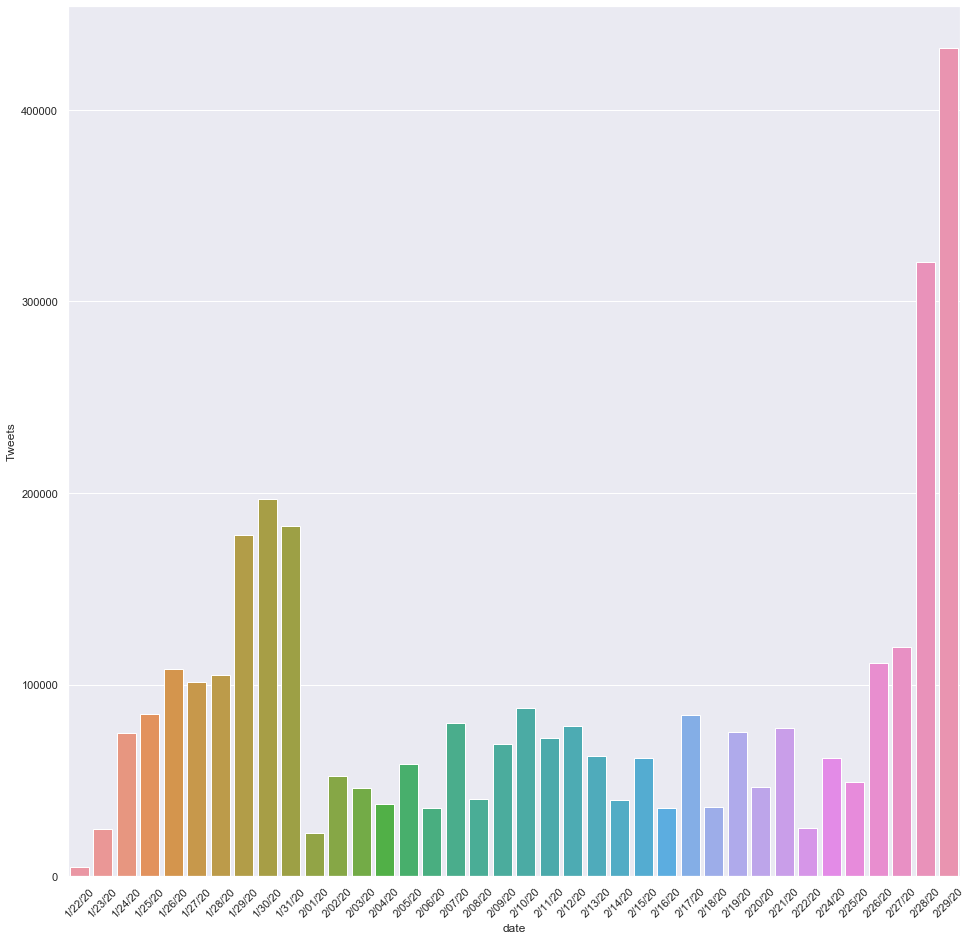

In [42]:
# tweets count per day
df = df[df['date'] != '1/21/20']
order = sorted(df['date'].unique())
plt.figure()
ax = sns.countplot(x='date', data=df, order=sorted(df['date'].unique()))
ax.set_ylabel('Tweets')
plt.xticks(rotation=45)
plt.show()

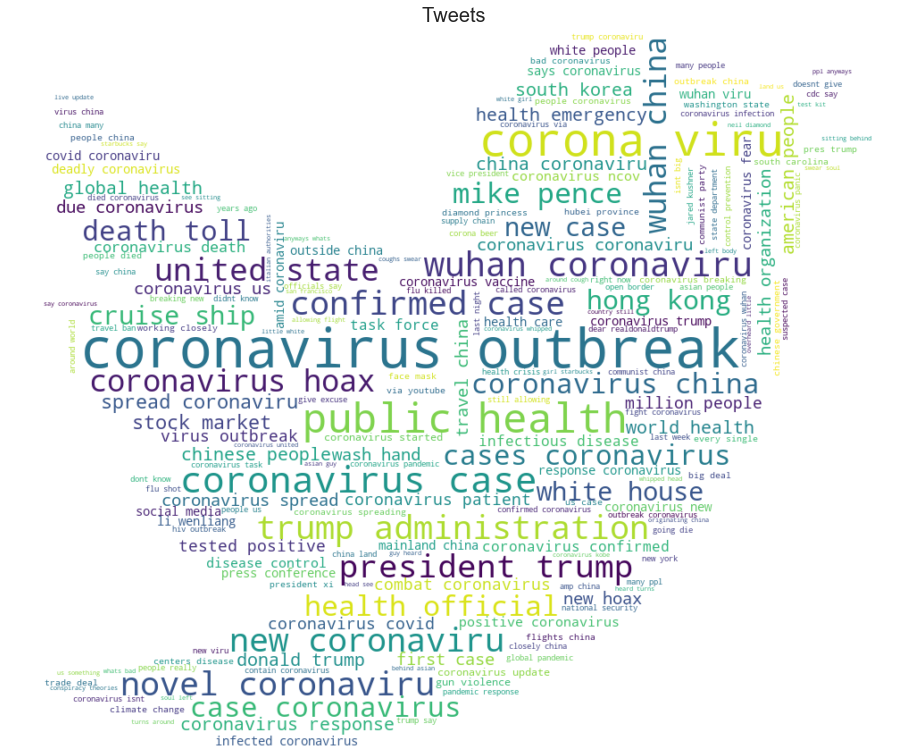

In [15]:
#words cloud of most comman words 
pos_mask = np.array(Image.open('src/twitter_mask.png'))
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'].tolist())

wordcloud = WordCloud(mask=pos_mask, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Tweets',size=20)
plt.show()

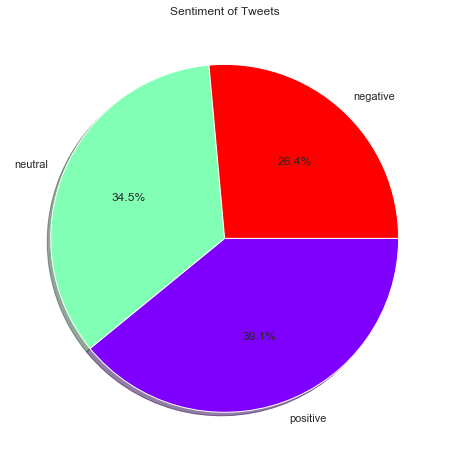

In [16]:
import matplotlib.cm as cm
plt.figure(figsize=(8,8))
#count data rating
counts = df['sentiment'].value_counts()
#rating pie
values = counts.values
labels = counts.index
explode = (0, 0, 0)
colors = cm.rainbow(np.linspace(0, 1, len(labels)))
plt.pie(values, 
        colors=colors, 
        labels=labels,
        explode=explode, 
        autopct='%1.1f%%',
        counterclock=False,
        shadow=True)
plt.title('Sentiment of Tweets')
plt.show()

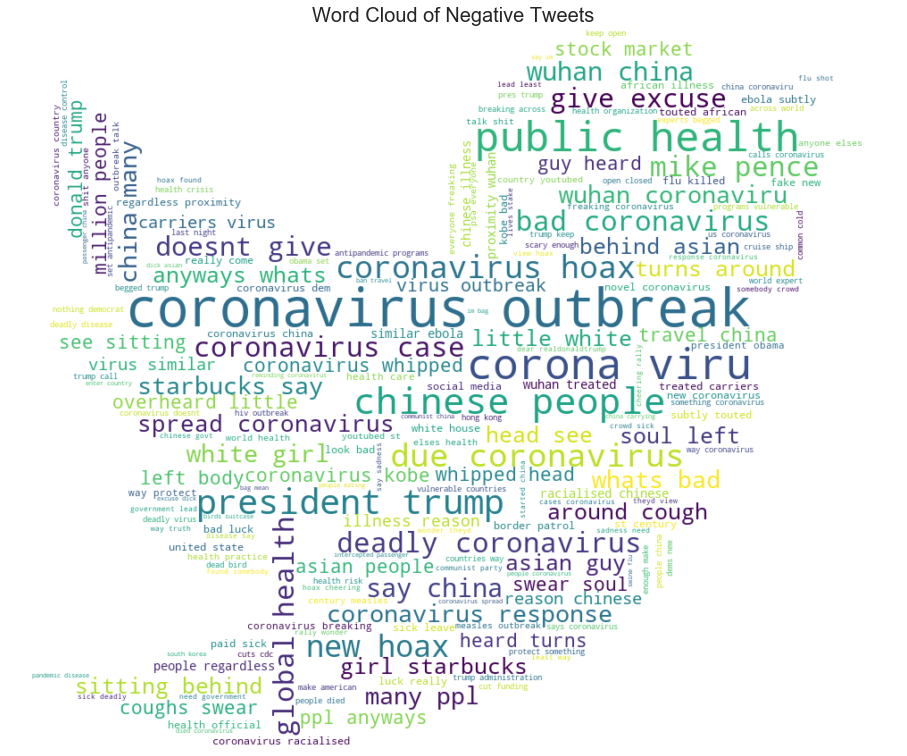

In [17]:
#words cloud of most comman words from negative tweets
pos_mask = np.array(Image.open('src/twitter_mask.png'))
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='negative'].tolist())

wordcloud = WordCloud(mask=pos_mask, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Word Cloud of Negative Tweets',size=20)
plt.show()

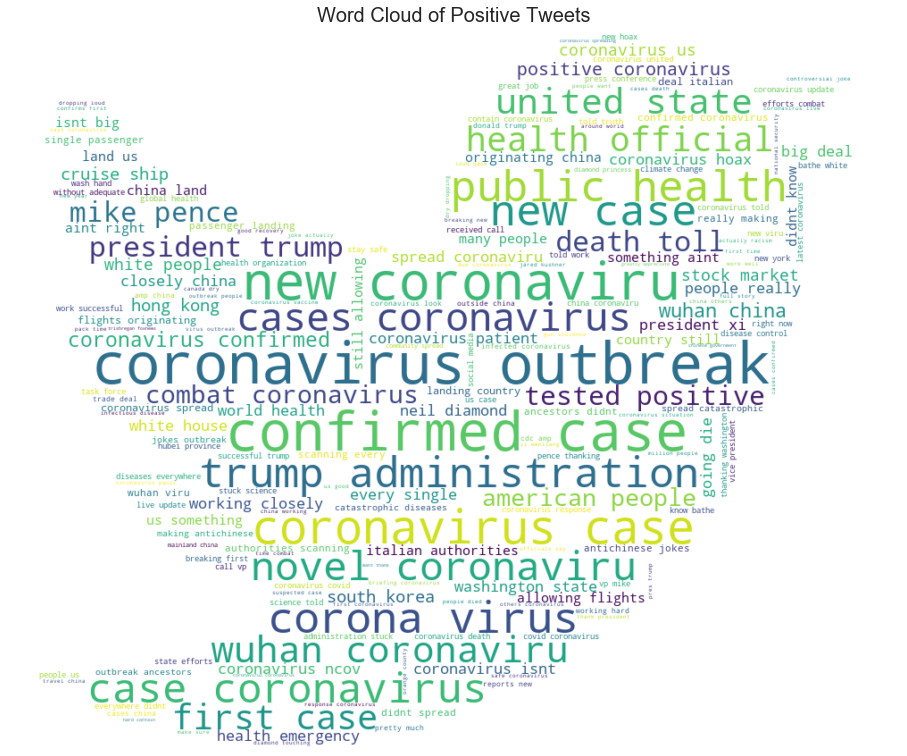

In [18]:
#words cloud of most comman words from positive tweets
pos_mask = np.array(Image.open('src/twitter_mask.png'))
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='positive'].tolist())

wordcloud = WordCloud(mask=pos_mask, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Word Cloud of Positive Tweets',size=20)
plt.show()

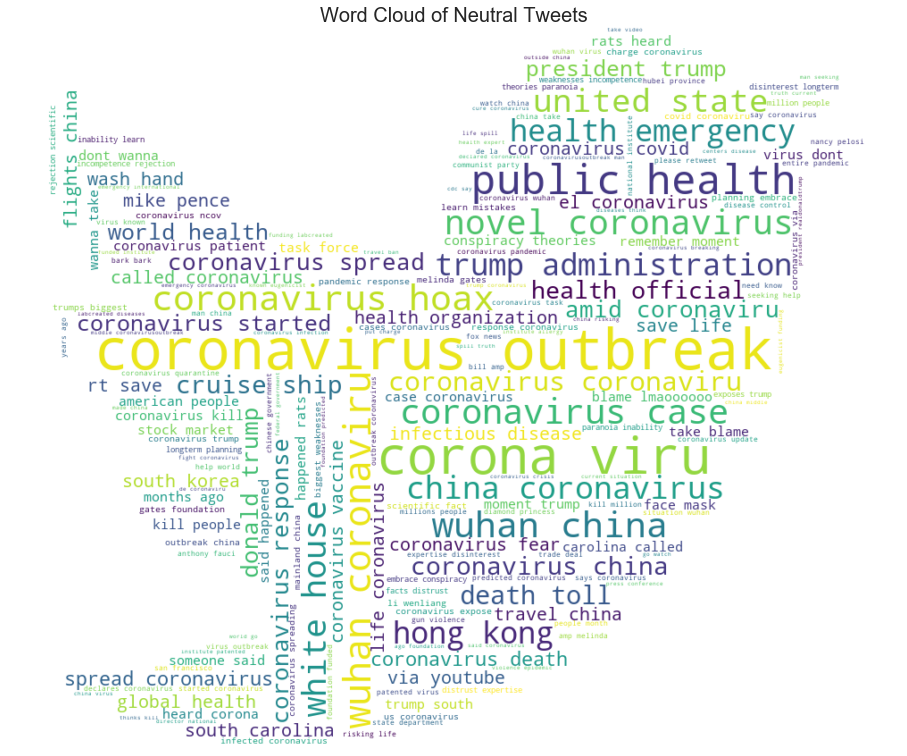

In [19]:
#words cloud of most comman words from neutral tweets
pos_mask = np.array(Image.open('src/twitter_mask.png'))
np.random.seed(321)
sns.set(rc={'figure.figsize':(16,16)})
text = ' '.join(df['text_clean'][df['sentiment']=='neutral'].tolist())

wordcloud = WordCloud(mask=pos_mask, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Word Cloud of Neutral Tweets',size=20)
plt.show()

In [20]:
from settings import states_full_dic
df['state_abb'] = df['state'].apply(lambda x: states_full_dic[x] if x is not np.nan else x)
df.head()

id_str                      created_at         state  \
0  1219856157608566784  Wed Jan 22 05:35:46 +0000 2020    California   
2  1219856816114487296  Wed Jan 22 05:38:23 +0000 2020     Wisconsin   
3  1219856906270990336  Wed Jan 22 05:38:44 +0000 2020  Pennsylvania   
4  1219857010696630272  Wed Jan 22 05:39:09 +0000 2020      New York   
6  1219858026242416640  Wed Jan 22 05:43:11 +0000 2020    New Jersey   

  sentiment                                         text_clean     date  \
0  positive  momsdemand brendaof fun fact  accidental death...  1/22/20   
2  positive  troopax johnmaamd ravin coqundoodledoo edwardh...  1/22/20   
3  negative                    brutal season protect yourself   1/22/20   
4  positive  wish administrators cdc could impeached failin...  1/22/20   
6  positive  united states first confirmed case new virus a...  1/22/20   

  state_abb  
0        CA  
2        WI  
3        PA  
4        NY  
6        NJ

In [21]:
states_abb = np.asarray(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
                        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
                        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
                        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
                        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

In [22]:
Counter(df['state']).most_common()

[('California', 543566),
 ('Texas', 346559),
 ('Florida', 257549),
 ('New York', 235285),
 ('Washington', 178988),
 ('Pennsylvania', 109470),
 ('Illinois', 106161),
 ('Georgia', 101404),
 ('Ohio', 95090),
 ('Arizona', 88789),
 ('Massachusetts', 83380),
 ('North Carolina', 83184),
 ('Michigan', 79983),
 ('Virginia', 79390),
 ('New Jersey', 69367),
 ('Colorado', 65723),
 ('Oregon', 64456),
 ('Tennessee', 59844),
 ('Maryland', 58401),
 ('Minnesota', 50123),
 ('Missouri', 47144),
 ('Indiana', 43764),
 ('Nevada', 43075),
 ('Wisconsin', 38167),
 ('Louisiana', 34524),
 ('South Carolina', 33754),
 ('Kentucky', 32459),
 ('Connecticut', 31813),
 ('Oklahoma', 28630),
 ('Utah', 21276),
 ('Arkansas', 21105),
 ('Kansas', 20756),
 ('Alabama', 20351),
 ('Hawaii', 17744),
 ('New Mexico', 17420),
 ('Iowa', 16786),
 ('Maine', 16724),
 ('Idaho', 15876),
 ('Nebraska', 15771),
 ('Mississippi', 14519),
 ('Alaska', 13506),
 ('Montana', 12413),
 ('West Virginia', 11569),
 ('New Hampshire', 10517),
 ('District 

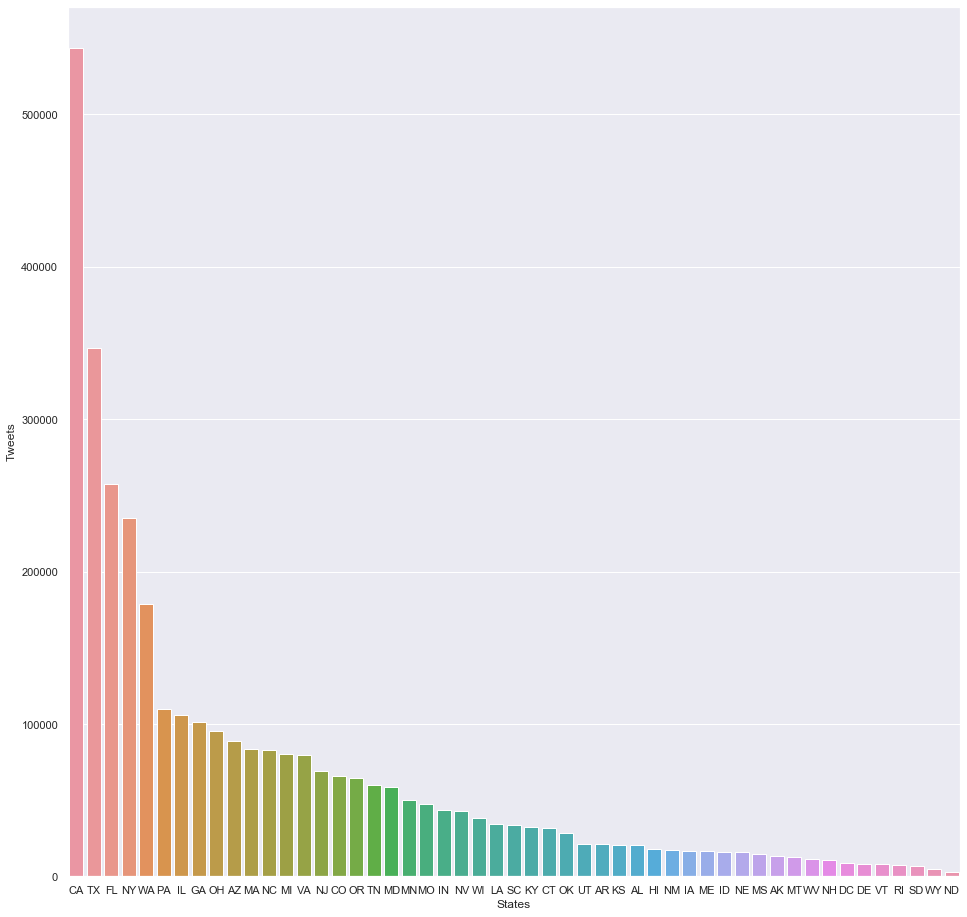

In [23]:
# tweets count per day
plt.figure()
ax = sns.countplot(x='state_abb', data=df, order=df['state_abb'].value_counts().index)
ax.set_ylabel('Tweets')
ax.set_xlabel('States')
plt.show()

In [24]:
from plotly.offline import iplot
from settings import states_abb
# tweets per state
tweets_perstate = np.asarray(df.groupby('state_abb').state_abb.count())

tweets_scale = [[0, 'rgb(229, 239, 245)'], [1, 'rgb(1, 97, 156)']]

data = [dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = tweets_scale,
        locations = states_abb,
        locationmode = 'USA-states',
        z = tweets_perstate,
        marker = dict(
            line = dict(
                color = 'rgb(255, 255, 255)',
                width = 2)
            ),
        colorbar = dict(
            title = 'Tweets per state')
        )]

layout = dict(
         title = 'United States Heatmap of Tweets Related to COVID-19',
         geo = dict(
             scope = 'usa',
             projection = dict(type = 'albers usa'),
             countrycolor = 'rgb(255, 255, 255)',
             showlakes = True,
             lakecolor = 'rgb(255, 255, 255)')
         )

figure = dict(data = data, layout = layout)
iplot(figure)

In [ ]:
from plotly.offline import iplot
from settings import states_abb
# tweets per state
tweets_perstate = np.asarray(df.groupby('state_abb').state_abb.count())

tweets_scale = [[0, 'rgb(229, 239, 245)'], [1, 'rgb(1, 97, 156)']]

data = [dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = tweets_scale,
        locations = states_abb,
        locationmode = 'USA-states',
        z = tweets_perstate,
        marker = dict(
            line = dict(
                color = 'rgb(255, 255, 255)',
                width = 2)
            ),
        colorbar = dict(
            title = 'Tweets per state')
        )]

layout = dict(
         title = 'United States Heatmap of Positive sentiment of Tweets Related to COVID-19',
         geo = dict(
             scope = 'usa',
             projection = dict(type = 'albers usa'),
             countrycolor = 'rgb(255, 255, 255)',
             showlakes = True,
             lakecolor = 'rgb(255, 255, 255)')
         )

figure = dict(data = data, layout = layout)
iplot(figure)

# 2. Correlation analysis

## 2.1 Correlation of total tweets and cases for each state

In [25]:
df_us = pd.read_csv('tweets/time_series_covid19_confirmed_US.csv')
df_us.head()

UID iso2 iso3  code3  FIPS Admin2            Province_State  \
0   16.0   AS  ASM     16  60.0    NaN            American Samoa   
1  316.0   GU  GUM    316  66.0    NaN                      Guam   
2  580.0   MP  MNP    580  69.0    NaN  Northern Mariana Islands   
3  630.0   PR  PRI    630  72.0    NaN               Puerto Rico   
4  850.0   VI  VIR    850  78.0    NaN            Virgin Islands   

  Country_Region      Lat     Long_  ... 4/18/20  4/19/20  4/20/20  4/21/20  \
0             US -14.2710 -170.1320  ...       0        0        0        0   
1             US  13.4443  144.7937  ...     136      136      136      136   
2             US  15.0979  145.6739  ...      14       14       14       14   
3             US  18.2208  -66.5901  ...    1118     1213     1252     1298   
4             US  18.3358  -64.8963  ...      53       53       53       53   

   4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  4/27/20  
0        0        0        0        0        0        0  
1      136      139      141      141      141      141  
2       14       14       14       14       14       14  
3     1252     1416     1276     1307     1371     1389  
4       54       54       54       55       57       57  

[5 rows x 108 columns]

In [26]:
df_states = df_us.groupby('Province_State').sum().reset_index()
df_states.head()

Province_State           UID  code3      FIPS          Lat        Long_  \
0         Alabama  5.796241e+09  57960  241491.0  2203.246784 -5809.578199   
1          Alaska  2.604232e+09  26040  232344.0  1747.579877 -4229.319334   
2  American Samoa  1.600000e+01     16      60.0   -14.271000  -170.132000   
3         Arizona  1.428230e+09  14280  230216.0   505.138555 -1671.948482   
4        Arkansas  6.468551e+09  64680  550635.0  2618.391704 -6932.548370   

   1/22/20  1/23/20  1/24/20  1/25/20  ...  4/18/20  4/19/20  4/20/20  \
0        0        0        0        0  ...     4712     4888     5079   
1        0        0        0        0  ...      314      319      321   
2        0        0        0        0  ...        0        0        0   
3        0        0        0        0  ...     4724     4933     5068   
4        0        0        0        0  ...     1744     1781     1973   

   4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  4/27/20  
0     5317     5593     5832     6026     6026     6421     6539  
1      329      335      337      339      339      340      345  
2        0        0        0        0        0        0        0  
3     5256     5473     5772     6045     6286     6534     6725  
4     1990     2276     2599     2810     2911     3001     3069  

[5 rows x 103 columns]

In [27]:
df_states['4/27/20'].sum()

988197

In [28]:
from settings import states_full_dic
df_date = df_states.drop(columns=['UID', 'code3', 'FIPS', 'Lat', 'Long_'])
df_date['state'] = df_states['Province_State']
df_date['state_abb'] = df_date['state'].apply(lambda x: states_full_dic[x] if x in states_full_dic else np.nan)
df_date.head()

Province_State  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0         Alabama        0        0        0        0        0        0   
1          Alaska        0        0        0        0        0        0   
2  American Samoa        0        0        0        0        0        0   
3         Arizona        0        0        0        0        1        1   
4        Arkansas        0        0        0        0        0        0   

   1/28/20  1/29/20  1/30/20  ...  4/20/20  4/21/20  4/22/20  4/23/20  \
0        0        0        0  ...     5079     5317     5593     5832   
1        0        0        0  ...      321      329      335      337   
2        0        0        0  ...        0        0        0        0   
3        1        1        1  ...     5068     5256     5473     5772   
4        0        0        0  ...     1973     1990     2276     2599   

   4/24/20  4/25/20  4/26/20  4/27/20           state  state_abb  
0     6026     6026     6421     6539         Alabama         AL  
1      339      339      340      345          Alaska         AK  
2        0        0        0        0  American Samoa         AS  
3     6045     6286     6534     6725         Arizona         AZ  
4     2810     2911     3001     3069        Arkansas         AR  

[5 rows x 100 columns]

In [29]:
# df_date.dropna(subset=['state_abb'])
# df_date = df_date[df_date['state_abb'].notna()]

In [30]:
tweets_count = Counter(df['state'])
df_date['tweets_count'] = df_date['state'].apply(lambda x: tweets_count[x])
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Columns: 101 entries, Province_State to tweets_count
dtypes: int64(98), object(3)
memory usage: 45.9+ KB


In [31]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Columns: 101 entries, Province_State to tweets_count
dtypes: int64(98), object(3)
memory usage: 45.9+ KB


In [32]:
total_cases = df_date['tweets_count'].sum()
total_tweets = df_date[cases_date].sum()

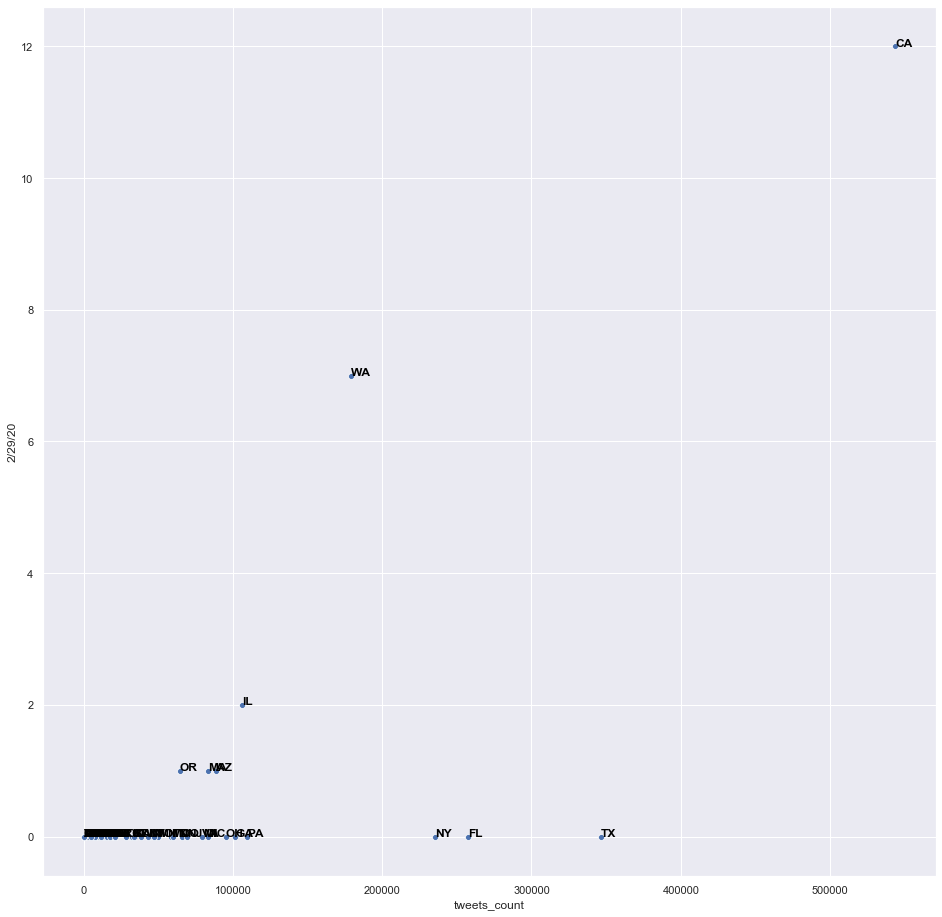

In [33]:
plt.figure()
ax = sns.scatterplot(x='tweets_count', 
                     y=cases_date, 
                     data=df_date, 
#                      hue='state_abb', 
                     palette="Set2")

# add annotations one by one with a loop
for line in range(df_date.shape[0]):
     ax.text(df_date['tweets_count'][line]+0.2, 
             df_date[cases_date][line], 
             df_date['state_abb'][line], 
             horizontalalignment='left', 
             size='medium', 
             color='black', 
             weight='semibold')

# plot line of total_tweets / total_ cases
# plt.plot([0, 0], [total_tweets, total_cases], 'k-', color = 'r')
plt.show()

## 2.2 Correlation of total tweets and cases in USA

In [34]:
tweets_date_daily = Counter(df['date'])
# drop date of 1/21/20
tweets_date_daily.pop("1/21/20", None)
date_order = sorted(tweets_date_daily)
# name format
for i in range(len(date_order)):
    x = str(date_order[i]).split('/')
    if len(x) > 1:
        if len(x[1]) == 1:
            x[1] = '0' + x[1]
            tweets_date_daily['/'.join(x)] = tweets_date_daily.pop(date_order[i])
print(tweets_date_daily)
date_order = sorted(tweets_date_daily)
print(date_order)

Counter({'2/29/20': 432342, '2/28/20': 320584, '1/30/20': 196901, '1/31/20': 182578, '1/29/20': 178279, '2/27/20': 119488, '2/26/20': 111094, '1/26/20': 108192, '1/28/20': 104838, '1/27/20': 101503, '2/10/20': 87843, '1/25/20': 84869, '2/17/20': 84332, '2/07/20': 80188, '2/12/20': 78341, '2/21/20': 77177, '2/19/20': 75524, '1/24/20': 74806, '2/11/20': 72137, '2/09/20': 69262, '2/13/20': 62753, '2/24/20': 61955, '2/15/20': 61647, '2/05/20': 58696, '2/02/20': 52580, '2/25/20': 49293, '2/20/20': 46610, '2/03/20': 46272, '2/08/20': 40330, '2/14/20': 39919, '2/04/20': 37601, '2/18/20': 35963, '2/06/20': 35829, '2/16/20': 35702, '2/22/20': 25136, '1/23/20': 24718, '2/01/20': 22484, '1/22/20': 5070})
['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/01/20', '2/02/20', '2/03/20', '2/04/20', '2/05/20', '2/06/20', '2/07/20', '2/08/20', '2/09/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20',

In [35]:
# match date format
c = list(df_date.columns)
c_new = list(df_date.columns)
for i in range(len(c)):
    x = str(c[i]).split('/')
    if len(x) > 1:
        if len(x[1]) == 1:
            x[1] = '0' + x[1]
            c_new[i] = '/'.join(x) 
df_date.rename(columns = {c[i]:c_new[i] for i in range(len(c))}, inplace = True) 
cd = df_date.columns
print([i for i in cd])

['Province_State', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/01/20', '2/02/20', '2/03/20', '2/04/20', '2/05/20', '2/06/20', '2/07/20', '2/08/20', '2/09/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/01/20', '3/02/20', '3/03/20', '3/04/20', '3/05/20', '3/06/20', '3/07/20', '3/08/20', '3/09/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/01/20', '4/02/20', '4/03/20', '4/04/20', '4/05/20', '4/06/20', '4/07/20', '4/08/20', '4/09/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4

In [36]:
# accumulate tweets data
tweets_date = {}
for i in range(len(date_order)):
    if i == 0:
        tweets_date[date_order[i]] = tweets_date_daily[date_order[i]]
    else:
        tweets_date[date_order[i]] = tweets_date_daily[date_order[i]] + tweets_date[date_order[i-1]]   
print("tweets_data: ")
print(tweets_date)
# total cases
cases_date = {key:df_date[key].sum() for key in tweets_date}
print("cases_date: ")
print(cases_date)

tweets_data: 
{'1/22/20': 5070, '1/23/20': 29788, '1/24/20': 104594, '1/25/20': 189463, '1/26/20': 297655, '1/27/20': 399158, '1/28/20': 503996, '1/29/20': 682275, '1/30/20': 879176, '1/31/20': 1061754, '2/01/20': 1084238, '2/02/20': 1136818, '2/03/20': 1183090, '2/04/20': 1220691, '2/05/20': 1279387, '2/06/20': 1315216, '2/07/20': 1395404, '2/08/20': 1435734, '2/09/20': 1504996, '2/10/20': 1592839, '2/11/20': 1664976, '2/12/20': 1743317, '2/13/20': 1806070, '2/14/20': 1845989, '2/15/20': 1907636, '2/16/20': 1943338, '2/17/20': 2027670, '2/18/20': 2063633, '2/19/20': 2139157, '2/20/20': 2185767, '2/21/20': 2262944, '2/22/20': 2288080, '2/24/20': 2350035, '2/25/20': 2399328, '2/26/20': 2510422, '2/27/20': 2629910, '2/28/20': 2950494, '2/29/20': 3382836}
cases_date: 
{'1/22/20': 1, '1/23/20': 1, '1/24/20': 2, '1/25/20': 2, '1/26/20': 5, '1/27/20': 5, '1/28/20': 5, '1/29/20': 5, '1/30/20': 5, '1/31/20': 7, '2/01/20': 8, '2/02/20': 8, '2/03/20': 11, '2/04/20': 11, '2/05/20': 11, '2/06/20':

In [37]:
def sentiment_percentage(key, sentiment):
    return (df[(df['date'] == key)]['sentiment']==sentiment).sum()/(df[(df['date'] == key)]['sentiment']).count()
# positive sentiment count
sentiment_pos =  {key:sentiment_percentage(key, 'positive') for key in date_order}
# negative sentiment count
sentiment_neg =  {key:sentiment_percentage(key, 'negative') for key in date_order}
# neutral sentiment count
sentiment_neut =  {key:sentiment_percentage(key, 'neutral') for key in date_order}

In [38]:
d = {
    'date':date_order, 
    'tweets':[tweets_date[i] for i in date_order], 
    'cases':[cases_date[i] for i in date_order],
    'sentiment_pos':[sentiment_pos[i] for i in date_order],
    'sentiment_neg':[sentiment_neg[i] for i in date_order],
    'sentiment_neut':[sentiment_neut[i] for i in date_order],
}
df_tweets_cases = pd.DataFrame(data=d)
df_tweets_cases.head()

date  tweets  cases  sentiment_pos  sentiment_neg  sentiment_neut
0  1/22/20    5070      1       0.595661       0.178698        0.225641
1  1/23/20   29788      1       0.438628       0.243669        0.317704
2  1/24/20  104594      2       0.453894       0.201414        0.344692
3  1/25/20  189463      2       0.424336       0.217830        0.357834
4  1/26/20  297655      5       0.427416       0.224370        0.348214

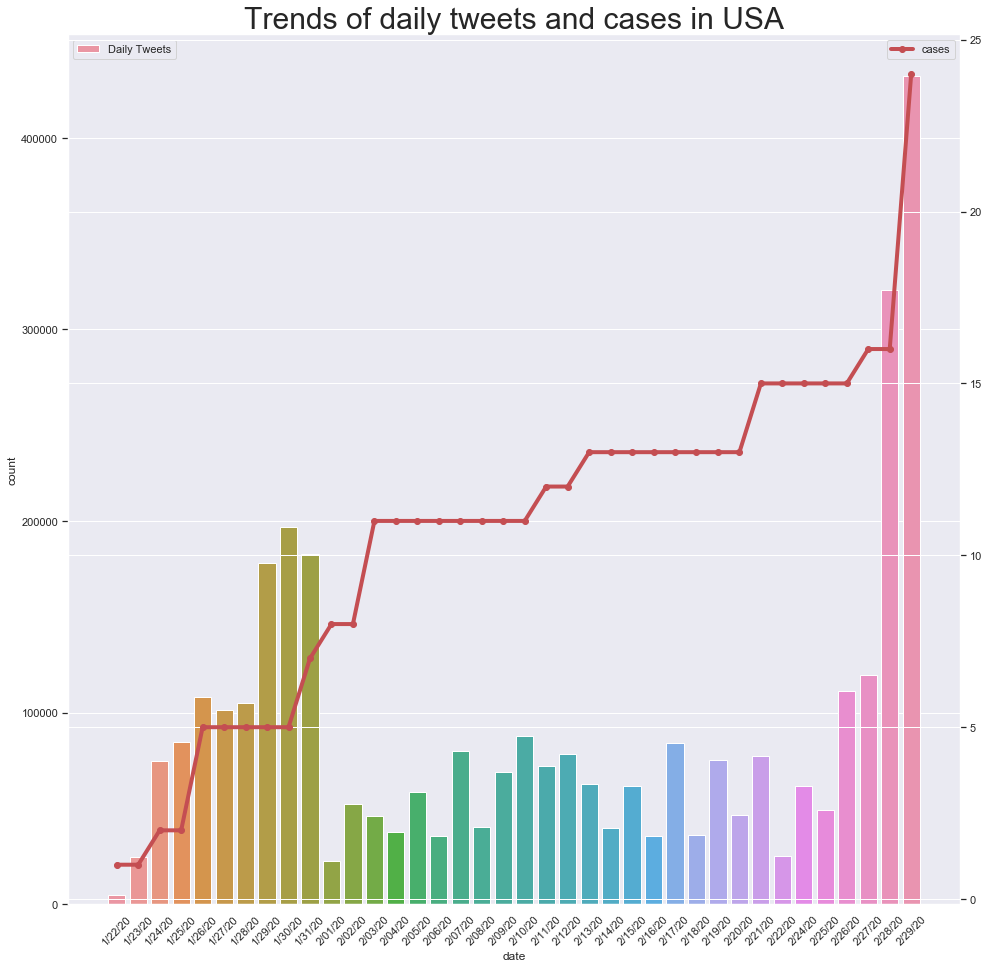

In [43]:
plt.figure()
ax1 = sns.countplot(x='date', 
                    data=df, 
                    label='Daily Tweets',
                    order=sorted(df['date'].unique()))

ax1.legend(loc=2)
plt.xticks(rotation=45)
ax2 = ax1.twinx()
df_tweets_cases.plot(x='date',
                     y='cases',
                     ax=ax2,
                     label='cases', 
                     style='ro-',
                     lw=4)
plt.title("Trends of daily tweets and cases in USA", fontsize=30, ha='center')
plt.xticks(rotation=45)
plt.show()

## 2.3 Correlation of sentiments and cases in USA

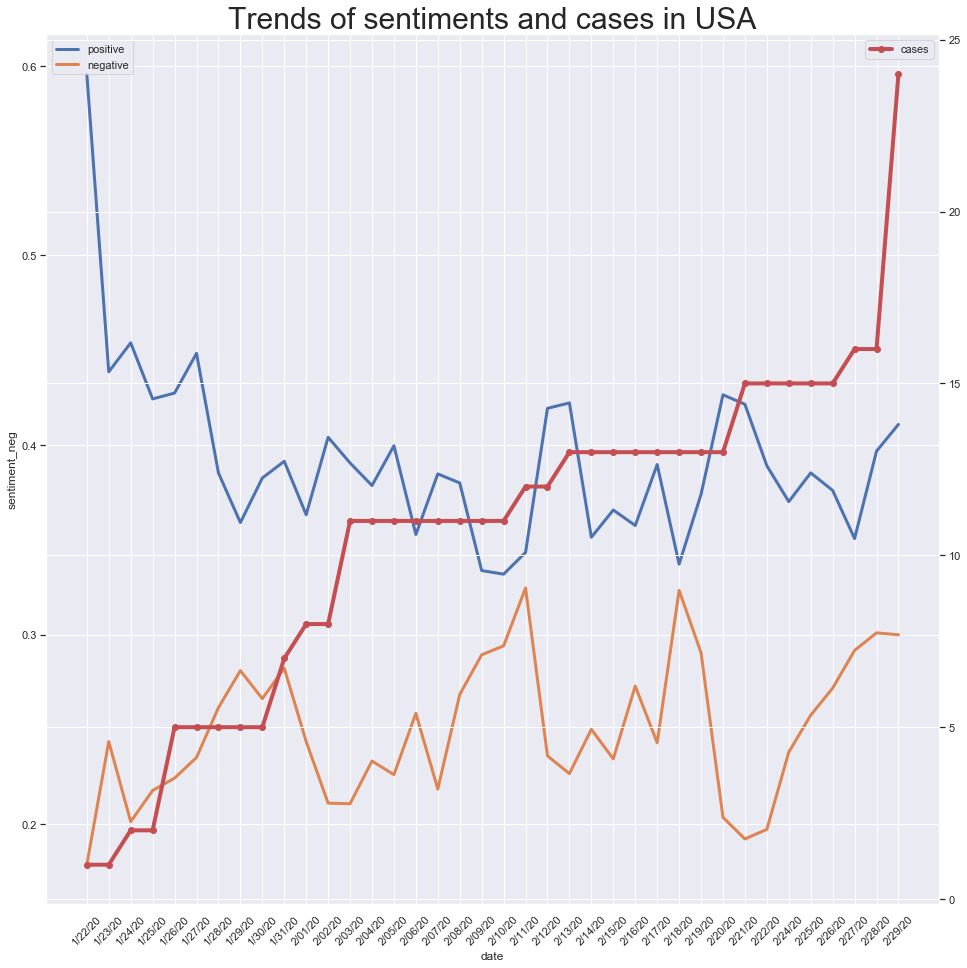

In [40]:
plt.figure()
ax_pos = sns.lineplot(x='date',
                      y='sentiment_pos', 
                      data=df_tweets_cases,
                      label='positive',
                      lw=3)
ax_neg = sns.lineplot(x='date',
                      y='sentiment_neg', 
                      data=df_tweets_cases,
                      label='negative',
                      lw=3)
ax_pos.legend(loc=2)
plt.xticks(rotation=45)
ax2 = ax_pos.twinx()
df_tweets_cases.plot(x='date',
                     y='cases',
                     ax=ax2,
                     label='cases', 
                     style='ro-',
                     lw=4)
plt.title("Trends of sentiments and cases in USA", fontsize=30, ha='center')
plt.xticks(rotation=45)
plt.show()